In [8]:
import json
from pathlib import Path

annotation_data_path = Path(
    "/local/scratch/carlyn.1/datasets/ap-10k/annotations/ap10k-train-split1.json"
)

with open(annotation_data_path, "r") as f:
    ann_data = json.load(f)

ann_data.keys()

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])

In [9]:
print(ann_data["annotations"])

[{'id': 441, 'image_id': 371, 'category_id': 1, 'bbox': [255, 209, 483, 387], 'area': 186921, 'iscrowd': 0, 'num_keypoints': 16, 'keypoints': [0, 0, 0, 681, 464, 2, 687, 527, 2, 612, 380, 2, 312, 257, 2, 501, 401, 2, 516, 467, 2, 528, 542, 2, 570, 401, 2, 627, 449, 2, 612, 539, 2, 321, 362, 2, 276, 404, 2, 282, 548, 2, 357, 374, 2, 321, 428, 2, 348, 563, 2]}, {'id': 273, 'image_id': 178, 'category_id': 1, 'bbox': [155, 214, 463, 450], 'area': 208350, 'iscrowd': 0, 'num_keypoints': 13, 'keypoints': [204, 312, 2, 0, 0, 0, 163, 353, 2, 290, 391, 2, 0, 0, 0, 363, 469, 2, 376, 536, 2, 402, 630, 2, 278, 479, 2, 255, 542, 2, 225, 628, 2, 0, 0, 0, 541, 512, 2, 525, 604, 2, 0, 0, 0, 582, 482, 2, 592, 561, 2]}, {'id': 274, 'image_id': 178, 'category_id': 1, 'bbox': [257, 202, 592, 457], 'area': 270544, 'iscrowd': 0, 'num_keypoints': 16, 'keypoints': [335, 314, 2, 0, 0, 0, 273, 357, 2, 457, 397, 2, 661, 385, 2, 514, 489, 2, 514, 555, 2, 514, 640, 2, 441, 485, 2, 404, 522, 2, 449, 610, 2, 698, 485

In [10]:
point_labels = []
categories = []
for cat_info in sorted(ann_data["categories"], key=lambda x: x["id"]):
    print(cat_info["id"], cat_info["name"])
    print(
        f"Number of keypoints: {len(cat_info['keypoints'])}"
    )  # They all have 17 key points
    point_labels.append(cat_info["keypoints"])  # All of them share the same labels
    categories.append(cat_info["name"])

for p in point_labels:
    print(p)

# 33 giraffe

1 antelope
Number of keypoints: 17
2 argali sheep
Number of keypoints: 17
3 bison
Number of keypoints: 17
4 buffalo
Number of keypoints: 17
5 cow
Number of keypoints: 17
6 sheep
Number of keypoints: 17
7 arctic fox
Number of keypoints: 17
8 dog
Number of keypoints: 17
9 fox
Number of keypoints: 17
10 wolf
Number of keypoints: 17
11 beaver
Number of keypoints: 17
12 alouatta
Number of keypoints: 17
13 monkey
Number of keypoints: 17
14 noisy night monkey
Number of keypoints: 17
15 spider monkey
Number of keypoints: 17
16 uakari
Number of keypoints: 17
17 deer
Number of keypoints: 17
18 moose
Number of keypoints: 17
19 hamster
Number of keypoints: 17
20 elephant
Number of keypoints: 17
21 horse
Number of keypoints: 17
22 zebra
Number of keypoints: 17
23 bobcat
Number of keypoints: 17
24 cat
Number of keypoints: 17
25 cheetah
Number of keypoints: 17
26 jaguar
Number of keypoints: 17
27 king cheetah
Number of keypoints: 17
28 leopard
Number of keypoints: 17
29 lion
Number of keypoints: 17
3

In [11]:
for key, value in ann_data["annotations"][0].items():
    print(key, value)

id 441
image_id 371
category_id 1
bbox [255, 209, 483, 387]
area 186921
iscrowd 0
num_keypoints 16
keypoints [0, 0, 0, 681, 464, 2, 687, 527, 2, 612, 380, 2, 312, 257, 2, 501, 401, 2, 516, 467, 2, 528, 542, 2, 570, 401, 2, 627, 449, 2, 612, 539, 2, 321, 362, 2, 276, 404, 2, 282, 548, 2, 357, 374, 2, 321, 428, 2, 348, 563, 2]


In [12]:
import os

# Count number of data files (10015 files)
total = 0
for _, _, files in os.walk(Path("/local/scratch/carlyn.1/datasets/ap-10k/data")):
    total += len(files)

total

10015

In [13]:
ann_data["images"][0]

{'license': 1,
 'id': 371,
 'file_name': '000000000371.jpg',
 'width': 1024,
 'height': 768,
 'background': 2}

In [15]:
img_ids = [x["image_id"] for x in ann_data["annotations"]]
print(
    len(img_ids), len(set(img_ids))
)  # TODO: This tells us that the same image may be used with different annotations... May have to look into this later

imgs_with_mul = []
for img_id in set(img_ids):
    c = img_ids.count(img_id)
    if c > 1:
        # print(img_id, c) # id 71 has 11 annotations!!!
        imgs_with_mul.append(img_id)
print(len(imgs_with_mul))

img_info = [img_info for img_info in ann_data["images"] if img_info["id"] == 71][0]
print(img_info)

img_path = img_info["file_name"]
#Image.open(Path("/local/scratch/carlyn.1/datasets/ap-10k/data") / img_path)

9122 7023
1189
{'license': 1, 'id': 71, 'file_name': '000000000071.jpg', 'width': 1024, 'height': 653, 'background': 1}


defaultdict(<class 'int'>, {0: 80, 1: 33, 2: 78, 3: 110, 4: 97, 5: 58, 7: 624, 8: 127, 9: 112, 10: 118, 11: 45, 12: 92, 13: 43, 14: 131, 15: 69, 16: 100, 17: 111, 18: 131, 19: 108, 20: 114, 21: 77, 22: 131, 23: 255, 24: 134, 25: 168, 26: 22, 27: 138, 28: 113, 29: 98, 30: 52, 31: 137, 32: 91, 33: 93, 34: 112, 35: 123, 37: 131, 38: 119, 39: 121, 40: 114, 41: 120, 42: 183, 43: 132, 44: 105, 45: 42, 46: 139, 47: 105, 49: 34, 50: 119, 51: 118, 52: 127})


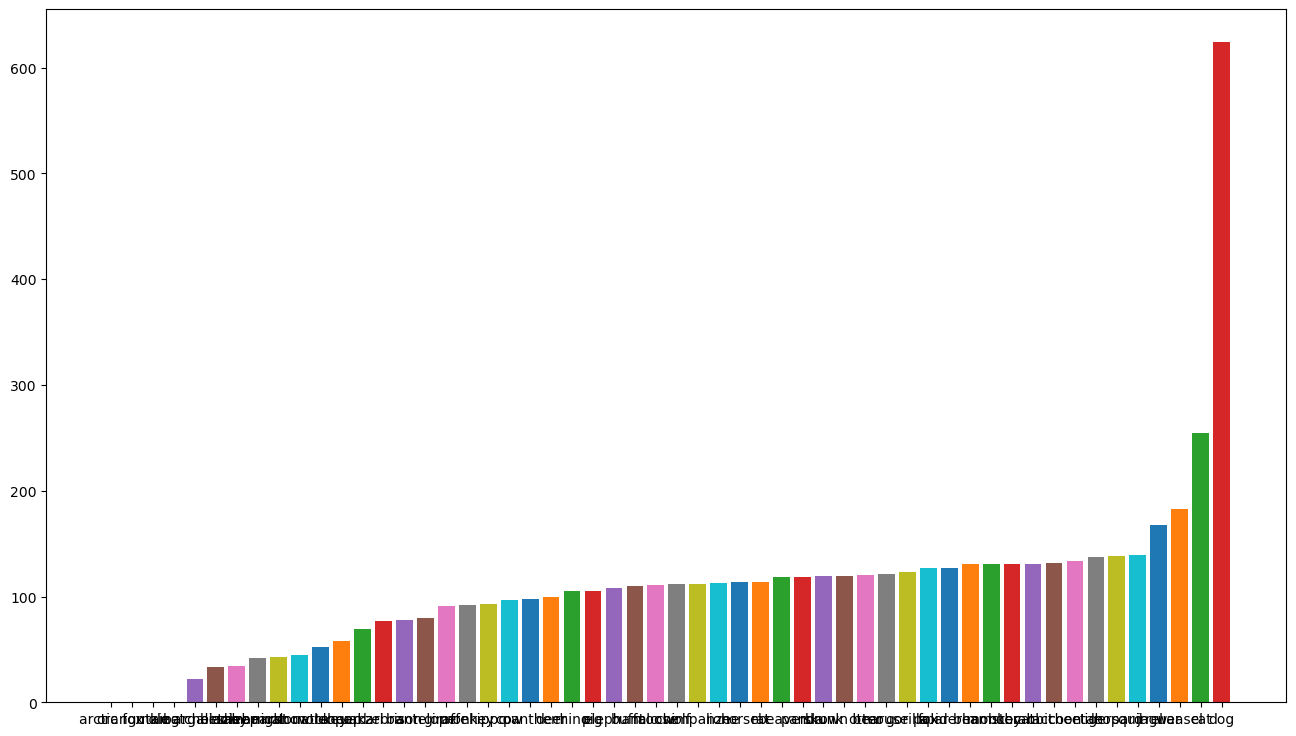

In [16]:
from collections import defaultdict
import matplotlib.pyplot as plt

counts = defaultdict(int)
for ann in ann_data["annotations"]:
    if ann["image_id"] in imgs_with_mul:
        continue
    cat_id = ann["category_id"] - 1
    counts[cat_id] += 1
print(counts)

data = sorted(
    [(cat, counts[i]) for i, cat in enumerate(categories)], key=lambda x: x[1]
)


fig, ax = plt.subplots(figsize=(16, 9))
for x, y in data:
    ax.bar(x, y)
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

In [29]:
ann_point = ann_data["annotations"][0]
img_info = ann_data["images"][0]

assert ann_point["image_id"] == img_info["id"], "IDs must match"


img_path = Path("/local/scratch/carlyn.1/datasets/ap-10k/data") / img_info["file_name"]
img_path

PosixPath('/local/scratch/carlyn.1/datasets/ap-10k/data/000000000371.jpg')

In [30]:
# Based on the file here: https://github.com/AlexTheBad/AP-10K/blob/main/tools/dataset/parse_animalpose_dataset.py
# It seems that the format is <x>, <y>, <is_valid>, <x2>, <y2>, <is_valid2>, ...?
# As long as the <is_valid> is not 0, it should be good. Even though the file only puts either 0 or 2

keypoints = []
all_keypoints = []
keypoint_visible = []
for i in range(len(ann_point["keypoints"]) // 3):
    si = i * 3
    x, y, is_valid = ann_point["keypoints"][si : si + 3]
    if is_valid > 0:
        keypoints.append((x, y))
    all_keypoints.append((x, y))
    keypoint_visible.append(is_valid > 0)
keypoints

[(681, 464),
 (687, 527),
 (612, 380),
 (312, 257),
 (501, 401),
 (516, 467),
 (528, 542),
 (570, 401),
 (627, 449),
 (612, 539),
 (321, 362),
 (276, 404),
 (282, 548),
 (357, 374),
 (321, 428),
 (348, 563)]

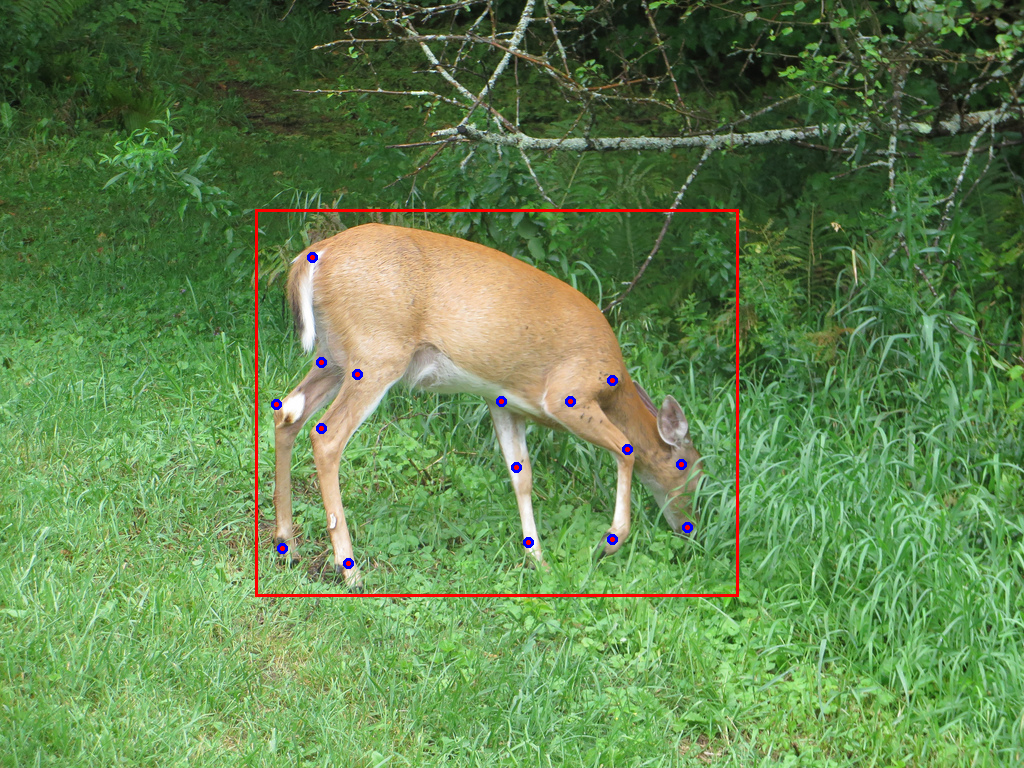

In [31]:
from PIL import Image, ImageDraw

img = Image.open(img_path)

imd = ImageDraw.Draw(img)

r = 5
for x, y in keypoints:
    imd.ellipse((x - r, y - r, x + r, y + r), fill="red", outline="blue", width=3)

x, y, w, h = ann_point["bbox"]
imd.rectangle((x, y, x + w, y + h), fill=None, outline="red", width=3)

img

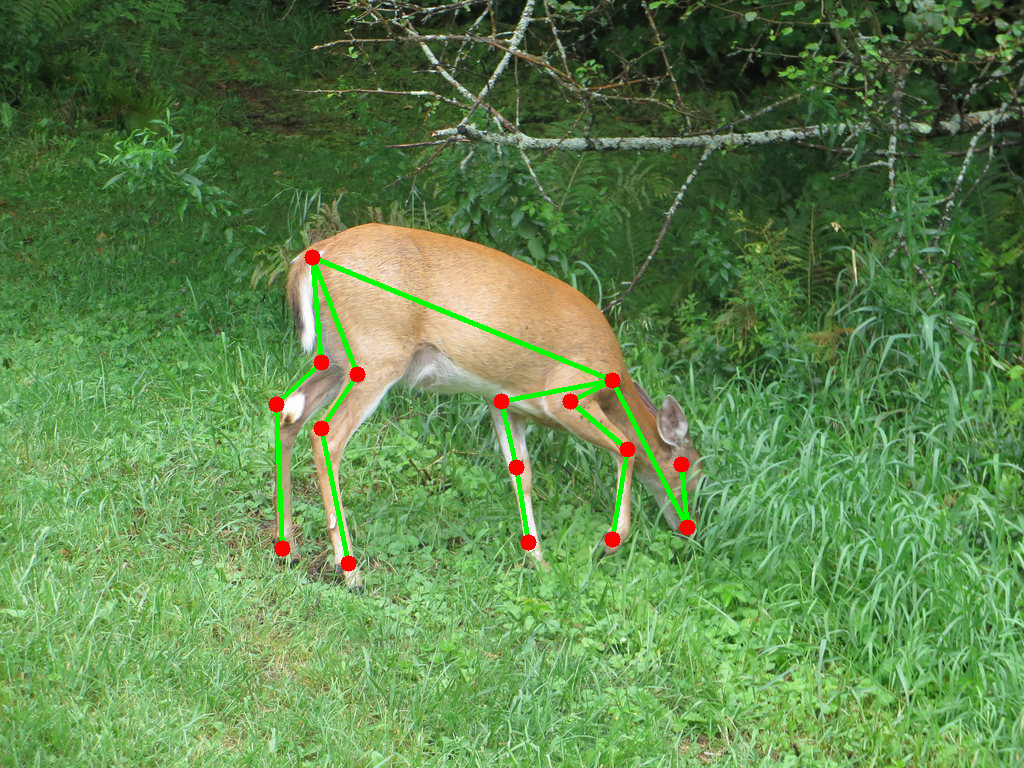

In [32]:
import numpy as np
from mmengine.structures import InstanceData
from mmpose.structures import PoseDataSample
from mmpose.visualization import PoseLocalVisualizer


image = np.array(Image.open(img_path))

# Have to subtract all values by 1, since the skeleton is 1 indexed
skeleton = [
    [link[0] - 1, link[1] - 1] for link in ann_data["categories"][1]["skeleton"]
]

pose_local_visualizer = PoseLocalVisualizer(radius=8, line_width=3, link_color="green")
gt_instances = InstanceData()
gt_instances.keypoints = np.array([all_keypoints])
gt_instances.keypoints_visible = np.array([keypoint_visible]).astype(np.uint8)
gt_pose_data_sample = PoseDataSample()
gt_pose_data_sample.gt_instances = gt_instances
dataset_meta = {"skeleton_links": skeleton}
pose_local_visualizer.set_dataset_meta(dataset_meta)
pose_img = pose_local_visualizer.add_datasample(
    "image", image, gt_pose_data_sample, draw_pred=False
)
Image.fromarray(pose_img)


[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


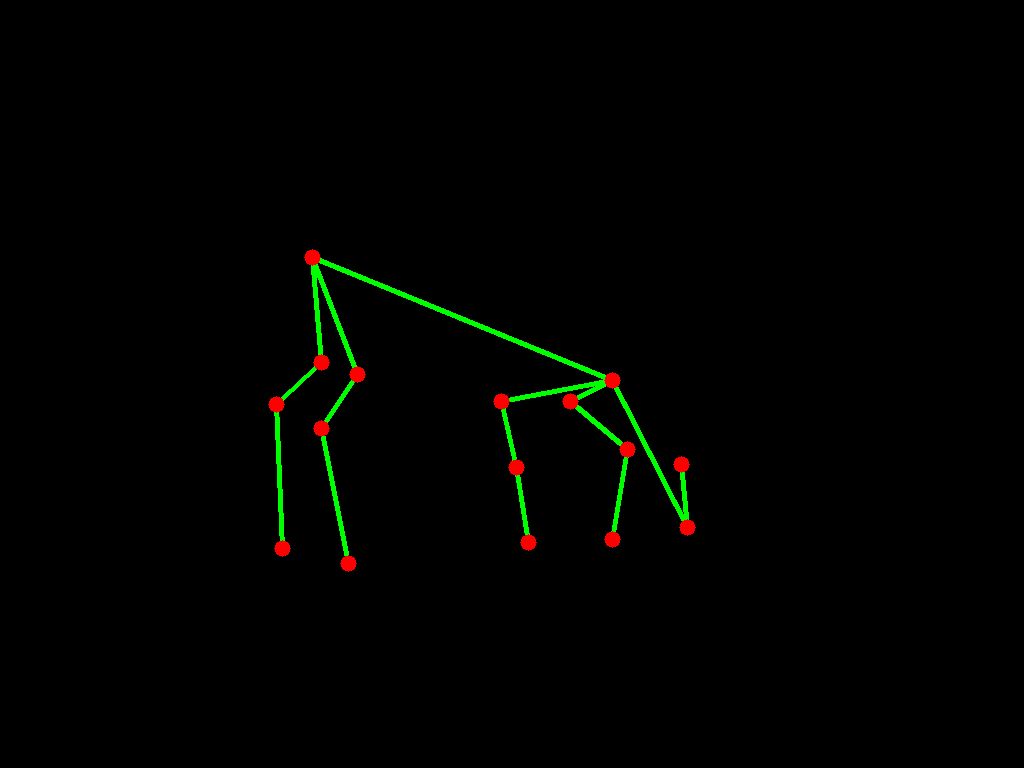

In [33]:
import numpy as np
from mmengine.structures import InstanceData
from mmpose.structures import PoseDataSample
from mmpose.visualization import PoseLocalVisualizer


image = np.zeros_like(np.array(Image.open(img_path)))

# Have to subtract all values by 1, since the skeleton is 1 indexed
skeleton = [
    [link[0] - 1, link[1] - 1] for link in ann_data["categories"][1]["skeleton"]
]

pose_local_visualizer = PoseLocalVisualizer(radius=8, line_width=3, link_color="green")
gt_instances = InstanceData()
gt_instances.keypoints = np.array([all_keypoints])
gt_instances.keypoints_visible = np.array([keypoint_visible]).astype(np.uint8)
gt_pose_data_sample = PoseDataSample()
gt_pose_data_sample.gt_instances = gt_instances
dataset_meta = {"skeleton_links": skeleton}
pose_local_visualizer.set_dataset_meta(dataset_meta)
pose_img = pose_local_visualizer.add_datasample(
    "image", image, gt_pose_data_sample, draw_pred=False
)
print(pose_img)
Image.fromarray(pose_img)